In [25]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#reading the data
temprature_data=pd.read_csv("/home/ec2-user/SageMaker/Data_Wrangling/DataSet/average-monthly-surface-temperature.csv")

In [9]:
temprature_data.head()

,Entity,Code,year,Day,Average surface temperature,Average surface temperature.1
0,Afghanistan,AFG,1940,1940-01-15,-2.032494,11.327695
1,Afghanistan,AFG,1940,1940-02-15,-0.733503,11.327695
2,Afghanistan,AFG,1940,1940-03-15,1.999134,11.327695
3,Afghanistan,AFG,1940,1940-04-15,10.199754,11.327695
4,Afghanistan,AFG,1940,1940-05-15,17.942135,11.327695


In [14]:
#removing the daily average temprature and keeping monthly 
temprature_data = temprature_data.drop("Average surface temperature",axis=1).rename(columns={"Average surface temperature.1":"Average surface temperature"})

In [15]:
temprature_data.head()

,Entity,Code,year,Day,Average surface temperature
0,Afghanistan,AFG,1940,1940-01-15,11.327695
1,Afghanistan,AFG,1940,1940-02-15,11.327695
2,Afghanistan,AFG,1940,1940-03-15,11.327695
3,Afghanistan,AFG,1940,1940-04-15,11.327695
4,Afghanistan,AFG,1940,1940-05-15,11.327695


# Data wrangling

In [16]:
temprature_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Entity                       198900 non-null  object 
 1   Code                         198900 non-null  object 
 2   year                         198900 non-null  int64  
 3   Day                          198900 non-null  object 
 4   Average surface temperature  198900 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 7.6+ MB


In [18]:
temprature_data.isnull().count()

Entity                         198900
Code                           198900
year                           198900
Day                            198900
Average surface temperature    198900
dtype: int64

##### No Null data found

In [20]:
#creating YEAR, MONTH AND DATE COLUMN FROM DAY COLUMN

#converted day column from object to datetime dataset
temprature_data["Day"] = pd.to_datetime(temprature_data["Day"])

#creating year,month and date
temprature_data["Year_Recorded"]= temprature_data["Day"].dt.year
temprature_data["Month_Recorded"]= temprature_data["Day"].dt.month
temprature_data["Date_Recorded"]= temprature_data["Day"].dt.day
temprature_data.head()

,Entity,Code,year,Day,Average surface temperature,Year_Recorded,Month_Recorded,Date_Recorded
0,Afghanistan,AFG,1940,1940-01-15,11.327695,1940,1,15
1,Afghanistan,AFG,1940,1940-02-15,11.327695,1940,2,15
2,Afghanistan,AFG,1940,1940-03-15,11.327695,1940,3,15
3,Afghanistan,AFG,1940,1940-04-15,11.327695,1940,4,15
4,Afghanistan,AFG,1940,1940-05-15,11.327695,1940,5,15


In [30]:
#month wise upgradation per year
temprature_data_afg=temprature_data[temprature_data["Code"]=="AFG"]
temprature_data_pivot=temprature_data_afg.pivot(index="Month_Recorded",columns="Year_Recorded",values="Average surface temperature")
temprature_data_pivot.head()

Year_Recorded,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Month_Recorded,,,,,,,,,,,,,,,,,,,,,
1,11.327695,13.324756,12.885448,11.524769,12.143665,11.366585,12.438739,12.343286,11.80402,10.509593,...,12.97697,13.773046,13.534129,13.735833,12.955677,12.358947,13.982914,13.753086,13.836377,13.49367
2,11.327695,13.324756,12.885448,11.524769,12.143665,11.366585,12.438739,12.343286,11.80402,10.509593,...,12.97697,13.773046,13.534129,13.735833,12.955677,12.358947,13.982914,13.753086,13.836377,13.49367
3,11.327695,13.324756,12.885448,11.524769,12.143665,11.366585,12.438739,12.343286,11.80402,10.509593,...,12.97697,13.773046,13.534129,13.735833,12.955677,12.358947,13.982914,13.753086,13.836377,13.49367
4,11.327695,13.324756,12.885448,11.524769,12.143665,11.366585,12.438739,12.343286,11.80402,10.509593,...,12.97697,13.773046,13.534129,13.735833,12.955677,12.358947,13.982914,13.753086,13.836377,13.49367
5,11.327695,13.324756,12.885448,11.524769,12.143665,11.366585,12.438739,12.343286,11.80402,10.509593,...,12.97697,13.773046,13.534129,13.735833,12.955677,12.358947,13.982914,13.753086,13.836377,13.49367


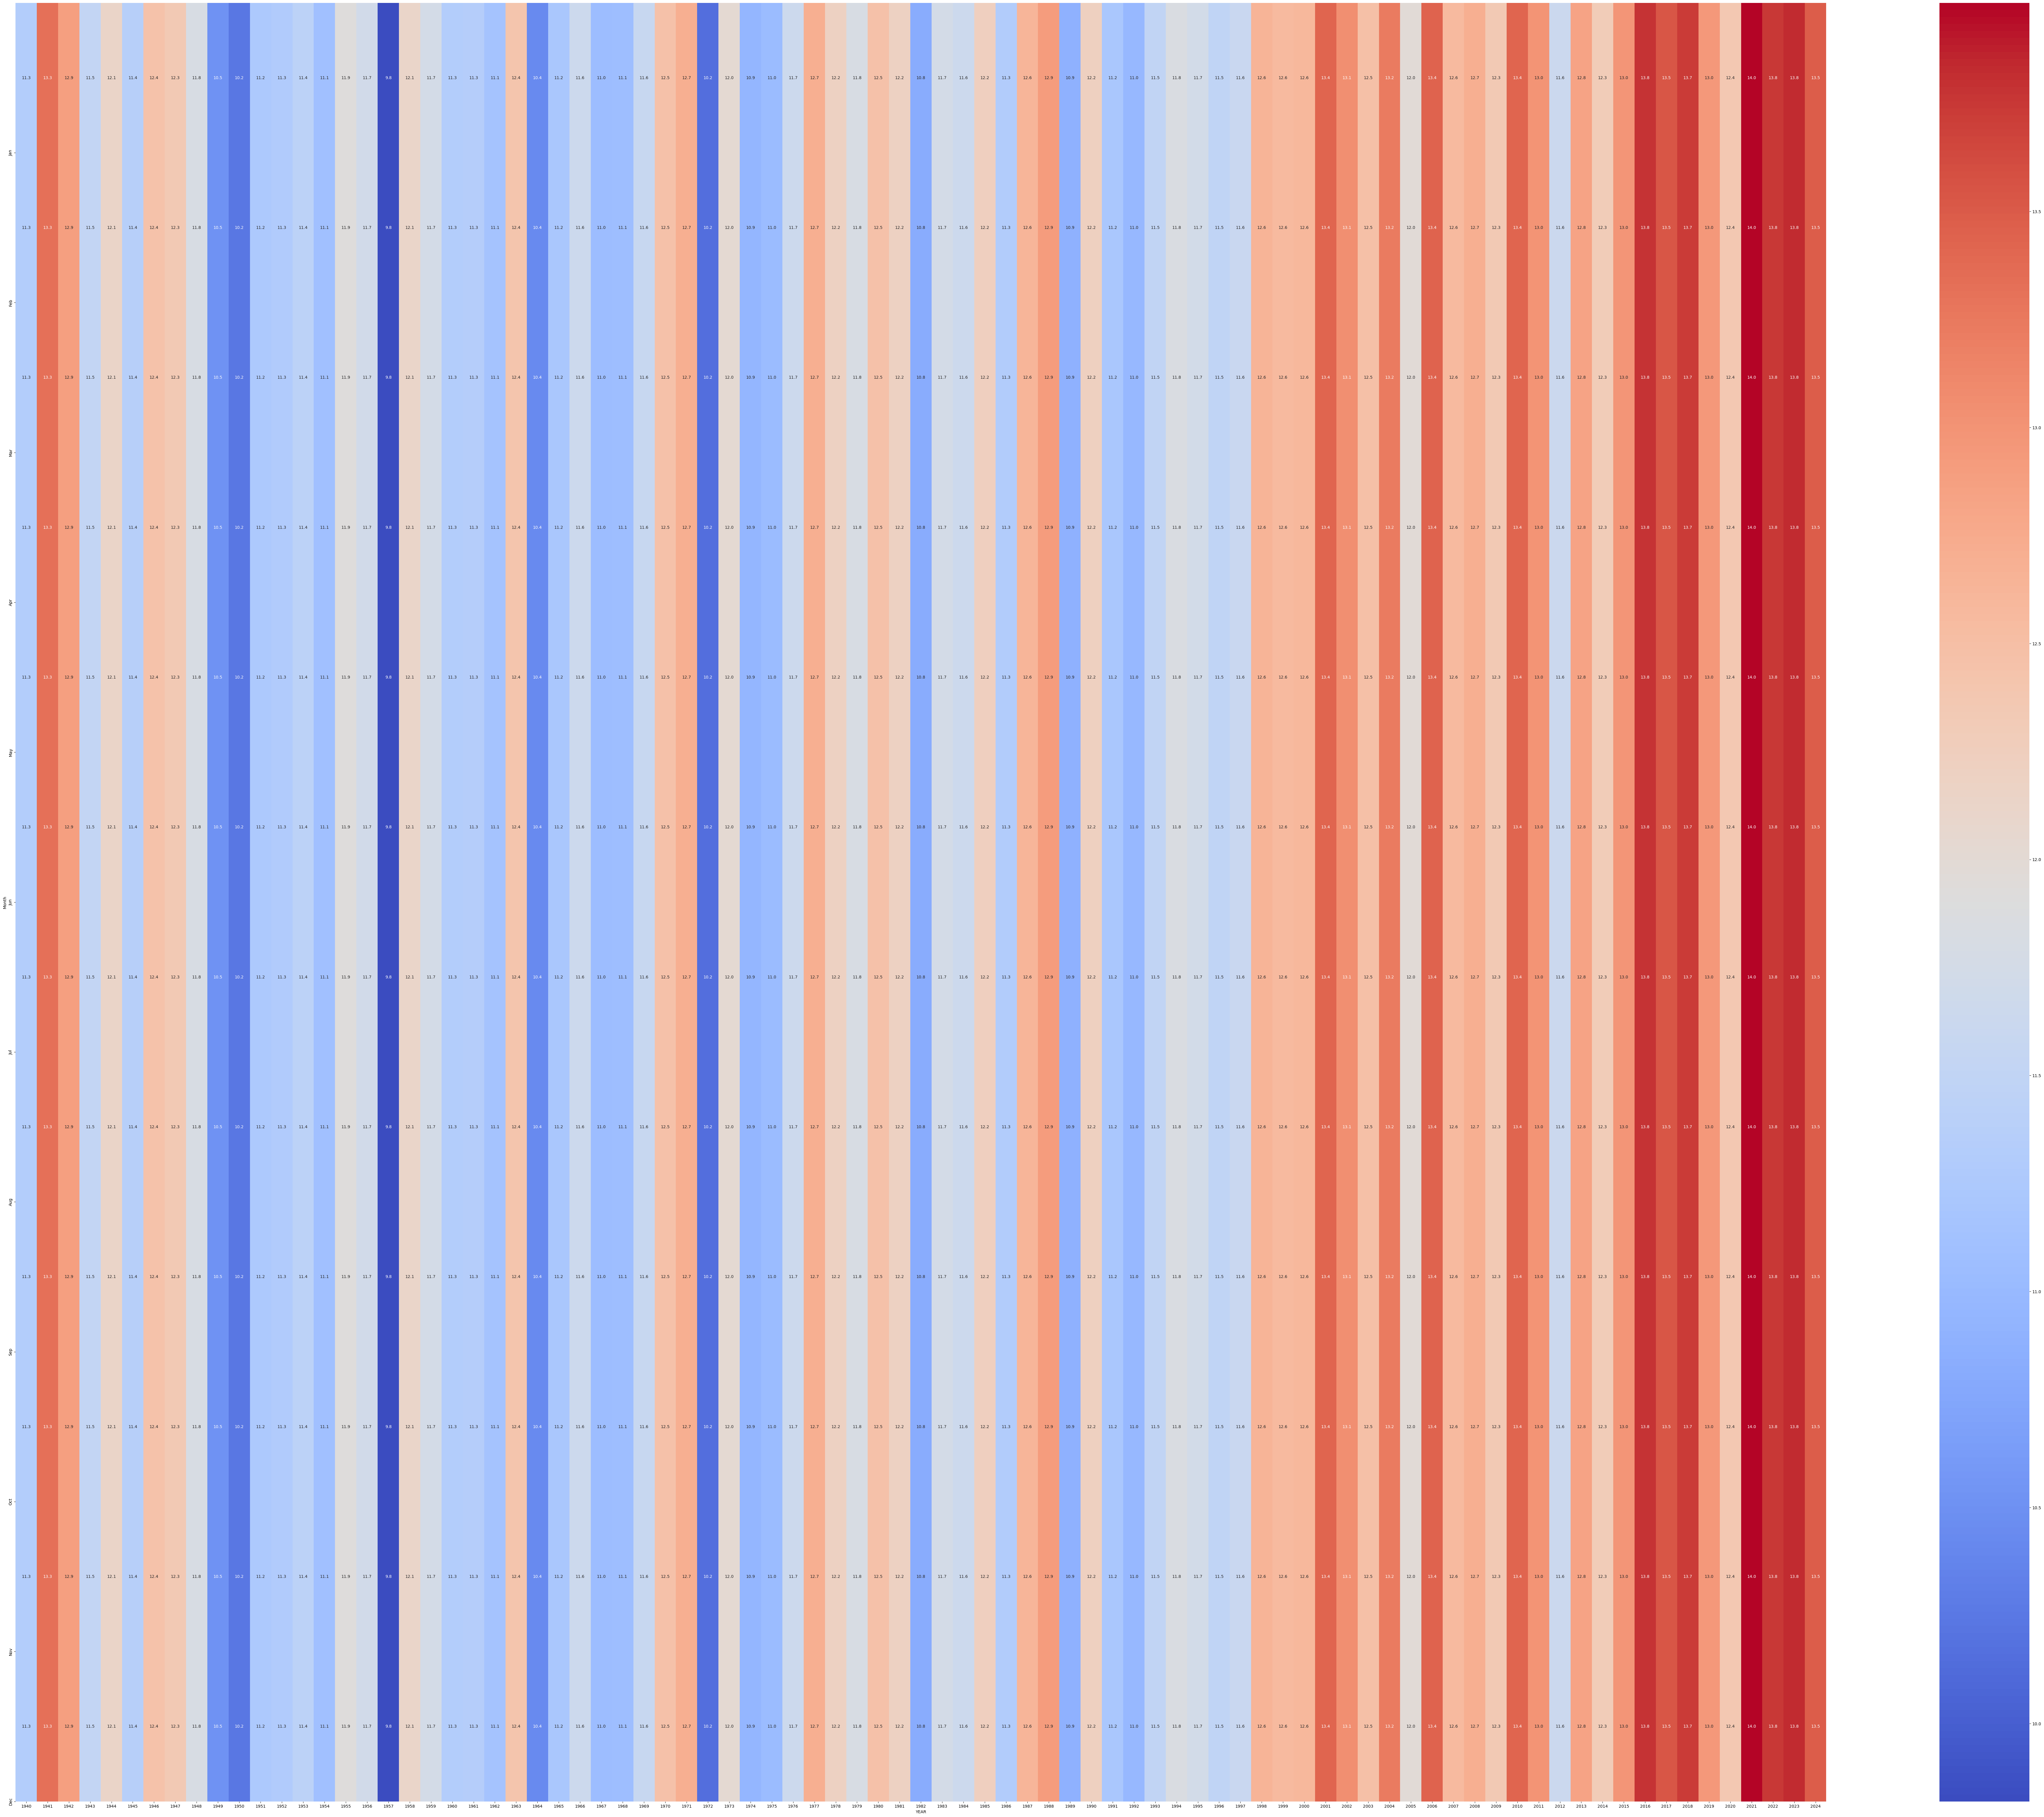

In [35]:
#ploting using heatmap
plt.figure(figsize=(100,80))
sns.heatmap(temprature_data_pivot,annot=True,cmap="coolwarm",fmt=".1f")
plt.xlabel("YEAR")
plt.ylabel("Month")
plt.yticks(ticks=range(1,13),labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.show()

In [69]:
#checking top 5 country with maximum yearly temp rise
year_avg =temprature_data.groupby(["Entity","Year_Recorded"])["Average surface temperature"].mean().reset_index()
temp_pivot=year_avg.pivot(index="Entity",columns="Year_Recorded",values="Average surface temperature")
temp_pivot["temprature_rise"]=temp_pivot[2024]-temp_pivot[1940]


In [64]:
temp_pivot.sort_values("temprature_rise",ascending=False).head()

Year_Recorded,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,temprature_rise
Entity,,,,,,,,,,,,,,,,,,,,,
Bosnia and Herzegovina,6.498960,7.671229,8.015025,9.464555,8.385572,8.695020,9.397851,9.145747,8.682202,8.705394,...,10.747972,10.610118,11.184226,11.368596,11.114944,10.760417,11.637614,11.923348,12.720257,6.221296
Belarus,3.797262,3.595985,3.919443,6.146254,6.469402,5.491923,6.033421,5.372556,6.636709,6.724481,...,7.767491,7.668084,7.928585,8.870999,9.106810,7.307895,7.840279,8.788589,9.523946,5.726684
Croatia,8.548524,9.786590,9.966245,11.495143,10.638849,10.844975,11.375316,11.191208,10.691793,11.384778,...,12.391713,12.490828,13.029073,13.174048,12.811767,12.436523,13.256803,13.628348,14.183044,5.634520
Slovakia,5.187697,6.205597,6.628323,7.283746,6.937564,6.947693,7.810114,7.151500,7.124189,7.572232,...,9.048446,8.815923,9.963116,9.987138,9.500337,8.627231,9.690214,10.018250,10.779922,5.592226
Poland,5.403254,5.938701,6.216551,8.040288,7.705893,7.581299,7.817397,6.916502,7.967876,8.244066,...,9.239871,8.973994,9.854872,10.291849,10.018490,8.628550,9.540886,10.121558,10.937722,5.534468


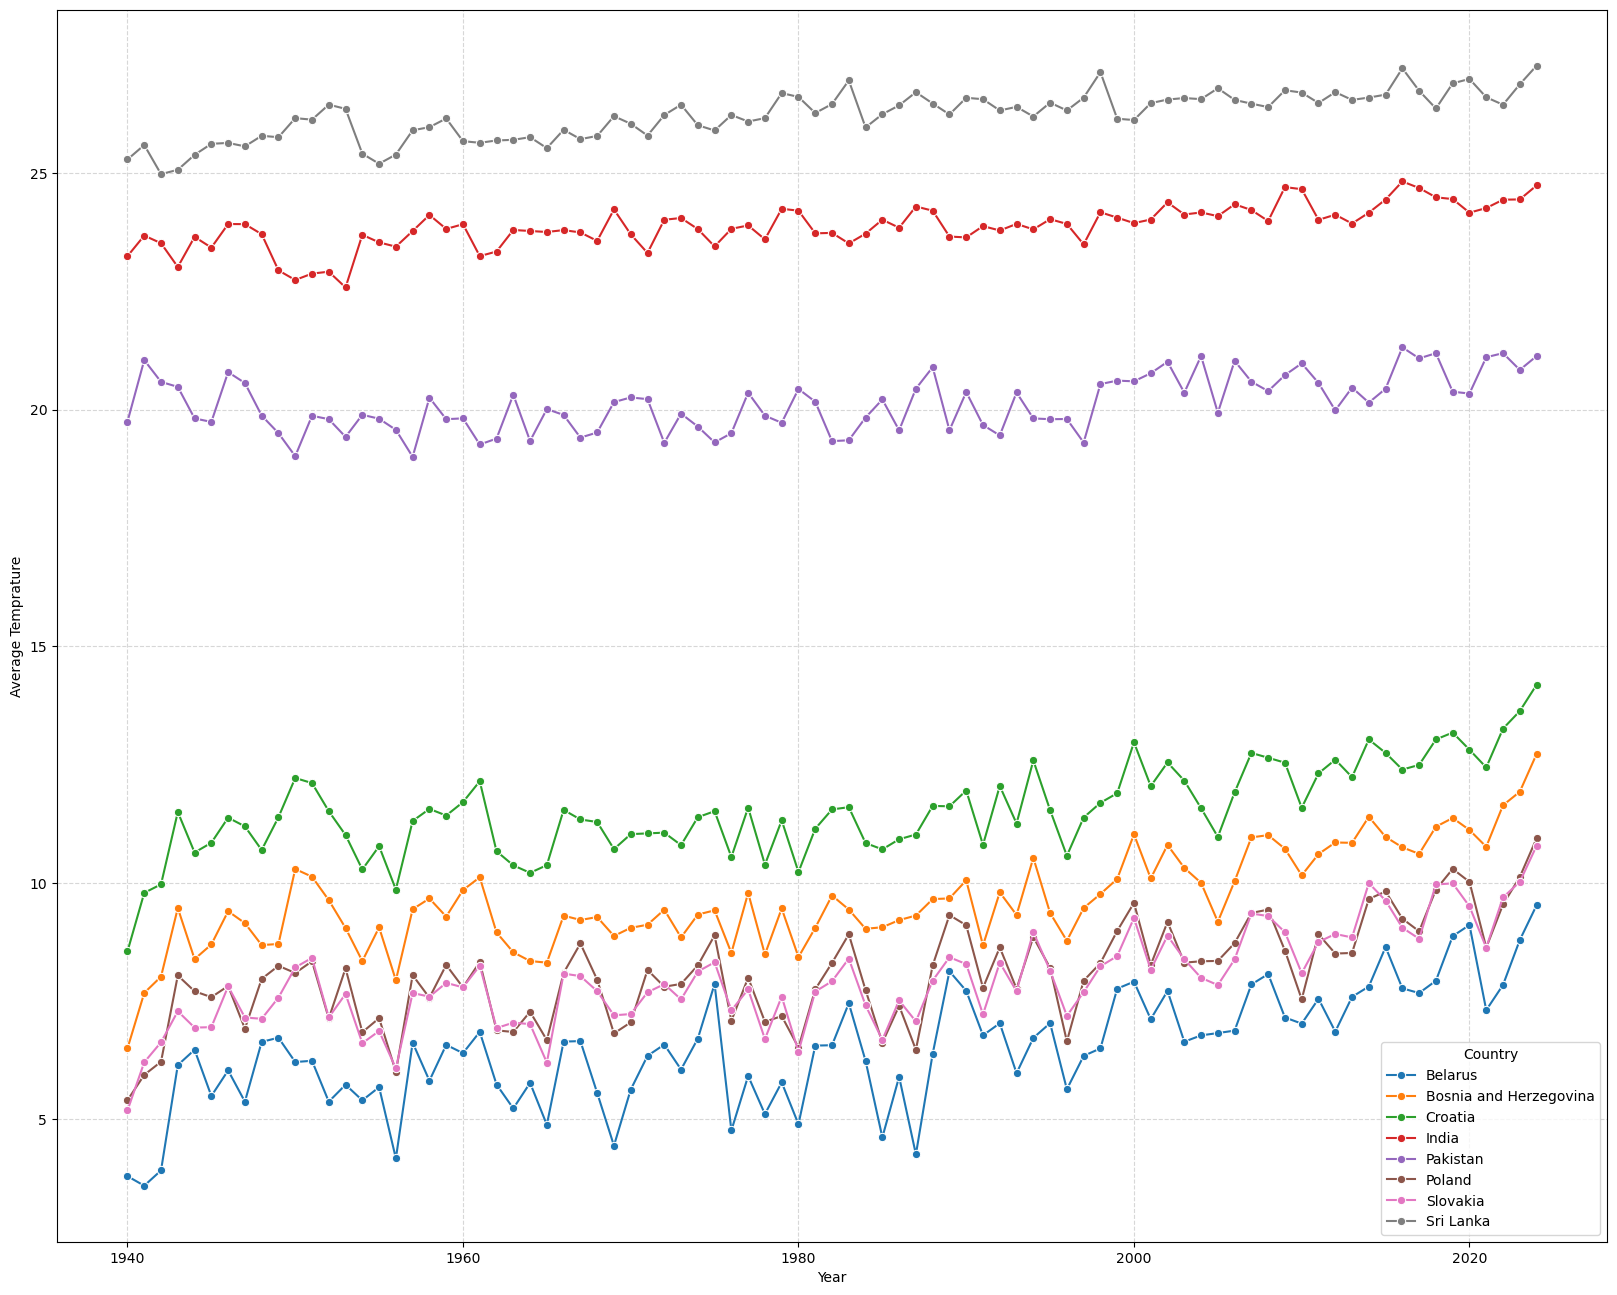

In [82]:
#ploting the top 5 country average temprature increase
year_avg_top_5=year_avg[year_avg["Entity"].isin(["Bosnia and Herzegovina","Belarus","Croatia","Slovakia","Poland","India","Pakistan","Sri Lanka"])]
plt.figure(figsize=(20,16))
sns.lineplot(data=year_avg_top_5,x="Year_Recorded",y="Average surface temperature",hue="Entity",marker='o',palette="tab10")
plt.xlabel("Year")
plt.ylabel("Average Temprature")
plt.legend(title="Country")
plt.grid(True,linestyle="--",alpha=0.5)
plt.show()